In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv('heart_2020_cleaned.csv')

In [3]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

## EDA & Visualization

In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df.iloc[:,0]=labelencoder.fit_transform(df.iloc[:,0])
df.iloc[:,2]=labelencoder.fit_transform(df.iloc[:,2])
df.iloc[:,3]=labelencoder.fit_transform(df.iloc[:,3])
df.iloc[:,4]=labelencoder.fit_transform(df.iloc[:,4])
df.iloc[:,7]=labelencoder.fit_transform(df.iloc[:,7])
df.iloc[:,8]=labelencoder.fit_transform(df.iloc[:,8])
df.iloc[:,9]=labelencoder.fit_transform(df.iloc[:,9])
df.iloc[:,10]=labelencoder.fit_transform(df.iloc[:,10])
df.iloc[:,11]=labelencoder.fit_transform(df.iloc[:,11])
df.iloc[:,12]=labelencoder.fit_transform(df.iloc[:,12])
df.iloc[:,13]=labelencoder.fit_transform(df.iloc[:,13])
df.iloc[:,15]=labelencoder.fit_transform(df.iloc[:,15])
df.iloc[:,16]=labelencoder.fit_transform(df.iloc[:,16])
df.iloc[:,17]=labelencoder.fit_transform(df.iloc[:,17])

In [6]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [7]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,6.514536,4.396742,0.300386,0.775362,2.220904,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.212208,0.716480,0.417344,1.534647,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,5.000000,0.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


In [8]:
df['Asthma'].value_counts()

0    276923
1     42872
Name: Asthma, dtype: int64

In [9]:
df[df.duplicated()].shape

(18078, 18)

In [10]:
df[df.duplicated()]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,0,19.85,0,0,0,0.0,0.0,0,0,12,5,0,1,0,7.0,0,0,0
3182,0,28.19,0,0,0,0.0,0.0,0,0,6,5,0,1,0,7.0,0,0,0
3397,0,26.54,0,0,0,0.0,0.0,0,1,5,5,0,1,0,6.0,0,0,0
3650,0,32.89,1,0,0,2.0,1.0,0,0,6,5,0,1,2,9.0,0,0,0
4061,0,25.84,0,0,0,0.0,0.0,0,0,4,5,0,1,0,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,0,25.06,0,0,0,0.0,0.0,0,1,4,3,0,1,0,7.0,0,0,0
319689,0,27.44,0,0,0,0.0,0.0,0,0,2,3,0,1,4,6.0,0,0,0
319726,0,30.41,0,0,0,0.0,0.0,0,1,0,3,0,1,0,7.0,0,0,0
319751,0,34.96,0,0,0,0.0,0.0,0,1,0,3,0,1,0,6.0,0,0,0


In [11]:
data=df.drop_duplicates()

In [12]:
data.shape

(301717, 18)

In [13]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


<AxesSubplot:xlabel='HeartDisease', ylabel='Count'>

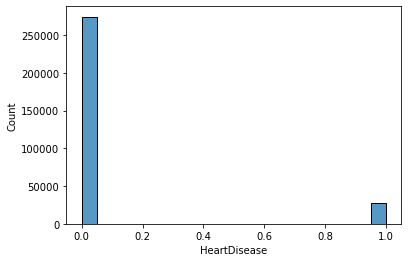

In [14]:
sns.histplot(data['HeartDisease'])

In [15]:
data['HeartDisease'].value_counts()

0    274456
1     27261
Name: HeartDisease, dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  int32  
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  int32  
 3   AlcoholDrinking   301717 non-null  int32  
 4   Stroke            301717 non-null  int32  
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  int32  
 8   Sex               301717 non-null  int32  
 9   AgeCategory       301717 non-null  int32  
 10  Race              301717 non-null  int32  
 11  Diabetic          301717 non-null  int32  
 12  PhysicalActivity  301717 non-null  int32  
 13  GenHealth         301717 non-null  int32  
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  int32  
 16  KidneyDisease     30

In [17]:
x=data.iloc[:,1:18]
y=data.iloc[:,0]

In [18]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 301717, dtype: int32

# OVER SAMPLING

In [19]:
#pip install imbalanced-learn
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [20]:
ros = RandomOverSampler(random_state=0)

In [21]:
x_resampled, y_resampled = ros.fit_resample(x,y)

(array([274456.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 274456.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

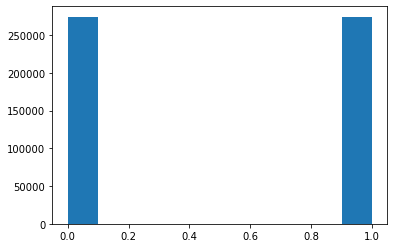

In [22]:
plt.hist(y_resampled)

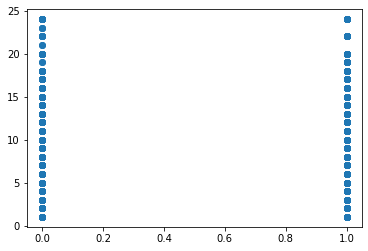

In [23]:
plt.scatter(y_resampled,x_resampled.SleepTime)

In [24]:
x_train, x_test,y_train,y_test = train_test_split(x_resampled,y_resampled, test_size=0.2)

In [25]:
#y_resampled1=y_resampled.drop('rf_pred')

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# DECISION TREE CLASSIFICATION

In [27]:
model = DecisionTreeClassifier(criterion = 'gini',min_samples_split=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=5)

In [28]:
#Predicting on test data
pred = model.predict(x_test) # predicting on test data set 
pd.Series(pred).value_counts() # getting the count of each category 

1    60273
0    49510
dtype: int64

In [29]:
from sklearn import metrics
metrics.accuracy_score(pred,y_test)

0.9520781906123899

In [30]:
confusion_matrix(y_test,pred)

array([[49437,  5188],
       [   73, 55085]], dtype=int64)

In [31]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     54625
           1       0.91      1.00      0.95     55158

    accuracy                           0.95    109783
   macro avg       0.96      0.95      0.95    109783
weighted avg       0.96      0.95      0.95    109783



# SAVING THE MODEL FOR DEPLOYMENT 

In [32]:
import pickle
from pickle import dump
from pickle import load

In [33]:
with open('model_pickle','wb') as f:
    pickle.dump(model,f)
with open('model_pickle','rb') as f:
    modelp= pickle.load(f)

In [34]:
# save the model to disk
dump(model, open('DecisionTree_model.pkl', 'wb'))

# load the model from disk
loaded_model = load(open('DecisionTree_model.pkl', 'rb'))
result = loaded_model.score(x, y)
print(result)

0.9791195060271711
